In [3]:
import pandas as pd



## 91

In [5]:
survey = pd.read_csv("../sample_100knocks/10章/survey.csv")
print(len(survey))
survey.head()

86


,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている(AA駅),1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2


In [6]:
survey.isna().sum()

datetime        0
comment         2
satisfaction    0
dtype: int64

In [9]:
survey = survey.dropna()
survey.isna().sum()

datetime        0
comment         0
satisfaction    0
dtype: int64

## 92

In [11]:
survey['comment'] = survey['comment'].str.replace('AA', '')
survey['comment'].head()

0     駅前に若者が集まっている(駅)
1    スポーツできる場所があるのが良い
2           子育て支援が嬉しい
3     保育園に入れる（待機児童なし）
4           駅前商店街が寂しい
Name: comment, dtype: object

In [13]:
survey['comment'] = survey['comment'].str.replace('\(.+?\)', '', regex=True)
survey['comment'].head()

0        駅前に若者が集まっている
1    スポーツできる場所があるのが良い
2           子育て支援が嬉しい
3     保育園に入れる（待機児童なし）
4           駅前商店街が寂しい
Name: comment, dtype: object

In [14]:
survey['comment'] = survey['comment'].str.replace('\（.+?\）', '', regex=True)
survey['comment'].head()

0        駅前に若者が集まっている
1    スポーツできる場所があるのが良い
2           子育て支援が嬉しい
3             保育園に入れる
4           駅前商店街が寂しい
Name: comment, dtype: object

## 93

In [15]:
survey['length'] = survey['comment'].str.len()
survey.head()

,datetime,comment,satisfaction,length
0,2019/3/11,駅前に若者が集まっている,1,12
1,2019/2/25,スポーツできる場所があるのが良い,5,16
2,2019/2/18,子育て支援が嬉しい,5,9
3,2019/4/9,保育園に入れる,4,7
4,2019/1/6,駅前商店街が寂しい,2,9


(array([11., 24., 21., 10.,  6.,  6.,  5.,  0.,  0.,  1.]),
 array([ 4. ,  8.6, 13.2, 17.8, 22.4, 27. , 31.6, 36.2, 40.8, 45.4, 50. ]),
 <a list of 10 Patch objects>)

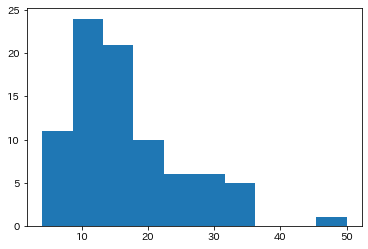

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(survey["length"])

In [30]:
import MeCab
tagger = MeCab.Tagger()
text = "すもももももももものうち"
words = tagger.parse(text)
words

'すもももももももものうち\t\udcb5\udcad\udcb9\udce6,\udcb0\udcec\udcc8\udccc,*,*,*,*,*\nEOS\n'

In [31]:
words = tagger.parse(text).splitlines()
words_arr = []
for i in words:
    if i == 'EOS': continue
    word_tmp = i.split()[0]
    words_arr.append(word_tmp)
words_arr

['すもももももももものうち']

In [32]:
 text = "すもももももももものうち"
words = tagger.parse(text).splitlines()
words_arr = []
parts = ["名詞", "動詞"]
words = tagger.parse(text).splitlines()
words_arr = []
for i in words:
    if i == 'EOS' or i == '': continue
    word_tmp = i.split()[0]
    part = i.split()[1].split(",")[0]
    if not (part in parts):continue
    words_arr.append(word_tmp)
words_arr

[]

## 96

In [33]:
all_words = []
parts = ["名詞"]
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_arr = []
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i.split()[0]
        part = i.split()[1].split(",")[0]
        if not (part in parts):continue
        words_arr.append(word_tmp)
    all_words.extend(words_arr)
print(all_words)

[]


In [34]:
survey

,datetime,comment,satisfaction,length
0,2019/3/11,駅前に若者が集まっている,1,12
1,2019/2/25,スポーツできる場所があるのが良い,5,16
2,2019/2/18,子育て支援が嬉しい,5,9
3,2019/4/9,保育園に入れる,4,7
4,2019/1/6,駅前商店街が寂しい,2,9
...,...,...,...,...
81,2019/1/21,小学校の校庭が芝生なのでとても良い,5,17
82,2019/4/30,ホームページからアンケートを投稿できるようにしてほしい,2,27
83,2019/1/9,公園に遊び道具が少なすぎる,1,13
84,2019/3/9,もっと公園を増やしてほしい,2,13


In [35]:
all_words_df = pd.DataFrame({"words":all_words, "count":len(all_words)*[1]})
all_words_df = all_words_df.groupby("words").sum()
all_words_df.sort_values("count",ascending=False).head()

,count
words,


### 97

In [36]:
stop_words = ["の"]
all_words = []
parts = ["名詞"]
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_arr = []
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i.split()[0]
        part = i.split()[1].split(",")[0]
        if not (part in parts):continue
        if word_tmp in stop_words:continue
        words_arr.append(word_tmp)
    all_words.extend(words_arr)
print(all_words)

[]


## 98

In [37]:
stop_words = ["の"]
parts = ["名詞"]
all_words = []
satisfaction = []
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_arr = []
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i.split()[0]
        part = i.split()[1].split(",")[0]
        if not (part in parts):continue
        if word_tmp in stop_words:continue
        words_arr.append(word_tmp)
        satisfaction.append(survey["satisfaction"].iloc[n])
    all_words.extend(words_arr)
all_words_df = pd.DataFrame({"words":all_words, "satisfaction":satisfaction, "count":len(all_words)*[1]})
all_words_df.head()

,words,satisfaction,count


In [38]:
words_satisfaction = all_words_df.groupby("words").mean()["satisfaction"]
words_count = all_words_df.groupby("words").sum()["count"]
words_df = pd.concat([words_satisfaction, words_count], axis=1)
words_df.head()

,satisfaction,count
words,,


In [39]:
words_df = words_df.loc[words_df["count"]>=3]
words_df.sort_values("satisfaction", ascending=False).head()

,satisfaction,count
words,,


In [40]:
words_df.sort_values("satisfaction").head()

,satisfaction,count
words,,


## 99

In [41]:
parts = ["名詞"]
all_words_df = pd.DataFrame()
satisfaction = []
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_df = pd.DataFrame()
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i.split()[0]
        part = i.split()[1].split(",")[0]
        if not (part in parts):continue
        words_df[word_tmp] = [1]
    all_words_df = pd.concat([all_words_df, words_df] ,ignore_index=True)
all_words_df.head()

""
